In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys


import legendre

In [2]:
N = 100
tmax=10
dt = tmax/N

lam = np.logspace(start=-8, stop=2, base=10, num=20)

S_norm_OM  = []
S_norm_MSR = []

for l in lam:
    t = legendre.transform_nomemory(lambda_=l, a=10, D=1, N=N, noise="d", pot="m", tmax=tmax)
    S_G = 2 * (t.Pot_mexico(0) - t.Pot_mexico(-1)) / (1 + l * 10 ** 2)

    #op = t.minimize_full()
    res = t.minimize()
    #S_norm_OM.append(op.fun/S_G)
    S_norm_MSR.append(res.fun/S_G)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.49957243671071316
            Iterations: 117
            Function evaluations: 11937
            Gradient evaluations: 117
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4995589252107509
            Iterations: 112
            Function evaluations: 11432
            Gradient evaluations: 112
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.499475369062713
            Iterations: 118
            Function evaluations: 12039
            Gradient evaluations: 118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.49922578994682854
            Iterations: 118
            Function evaluations: 12040
            Gradient evaluations: 118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.49840664419887254
            Iterations: 116
 

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3193357299373889
            Iterations: 139
            Function evaluations: 14156
            Gradient evaluations: 139
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23294991366224038
            Iterations: 125
            Function evaluations: 12733
            Gradient evaluations: 125
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13825637337511965
            Iterations: 95
            Function evaluations: 9685
            Gradient evaluations: 95
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06027928608590636
            Iterations: 86
            Function evaluations: 8691
            Gradient evaluations: 86
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.020412297906527224
            Iterations: 78
     

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.006299198974665906
            Iterations: 112
            Function evaluations: 11313
            Gradient evaluations: 112
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0019317930220221437
            Iterations: 129
            Function evaluations: 13030
            Gradient evaluations: 129
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0007260008955634508
            Iterations: 78
            Function evaluations: 7879
            Gradient evaluations: 78
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0004103501301748123
            Iterations: 31
            Function evaluations: 3131
            Gradient evaluations: 31
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0004999458400912207
            Iterations:

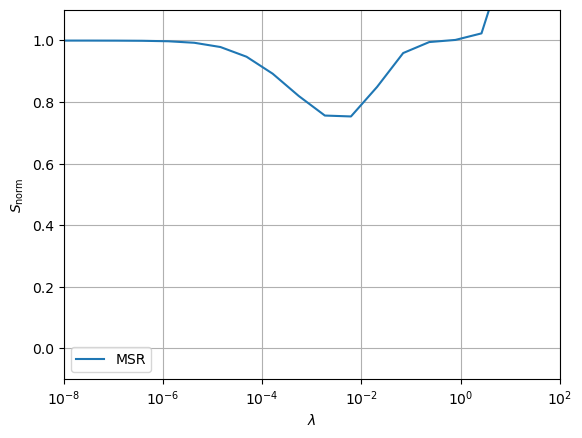

In [3]:
fig3 = plt.figure()
#plt.plot(lam, S_norm_OM, label="OM")
plt.plot(lam, S_norm_MSR, label="MSR")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$S_\mathrm{norm}$")
plt.xscale("log")
plt.grid()
plt.legend()
plt.axis([min(lam), max(lam), -0.1, 1.1])
plt.savefig("S_norm_test.pdf", dpi=500, bbox_inches="tight")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre


tau = [1.0, 0.2, 0.05]
tmax = 4
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

test1 =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[0], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res1 = test1.minimize(in_cond=np.ones(2*N) * (-1e-1))
test2 =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res2 = test2.minimize(in_cond=np.ones(2*N) * (-1e-1))
test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[2], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res = test.minimize(in_cond=np.ones(2*N) * (-1e-1))



Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.2519738951362305
            Iterations: 155
            Function evaluations: 47333
            Gradient evaluations: 155
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.320804165865805
            Iterations: 160
            Function evaluations: 48672
            Gradient evaluations: 160
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1516822194867635
            Iterations: 156
            Function evaluations: 47218
            Gradient evaluations: 156


Text(0, 0.5, '$q$')

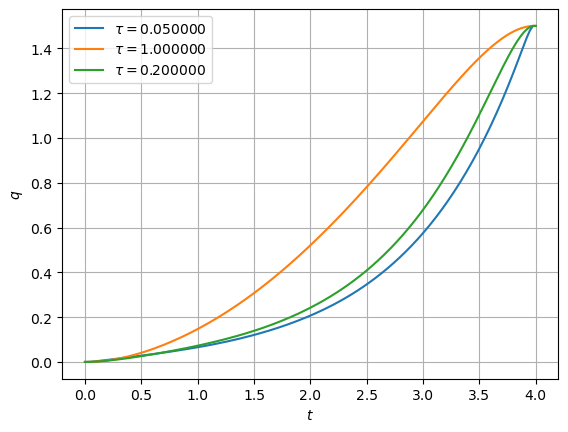

In [3]:
plt.plot(time, res.x[:N], label=r"$\tau=%f$" % tau[2])
plt.plot(time, res1.x[:N], label=r"$\tau=%f$" % tau[0])
plt.plot(time, res2.x[:N], label=r"$\tau=%f$" % tau[1])
plt.legend()
plt.grid()
plt.xlabel(r"$t$")
plt.ylabel(r"$q$")

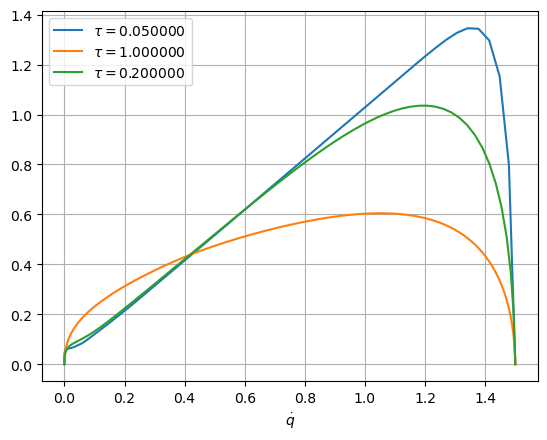

In [4]:
plt.plot(res.x[:N-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\tau=%f$" % tau[2])
plt.plot(res1.x[:N-1], (res1.x[1:N] - res1.x[:N-1])/dt, label=r"$\tau=%f$" % tau[0])
plt.plot(res2.x[:N-1], (res2.x[1:N] - res2.x[:N-1])/dt, label=r"$\tau=%f$" % tau[1])
plt.xlabel(r"$q$")
plt.xlabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

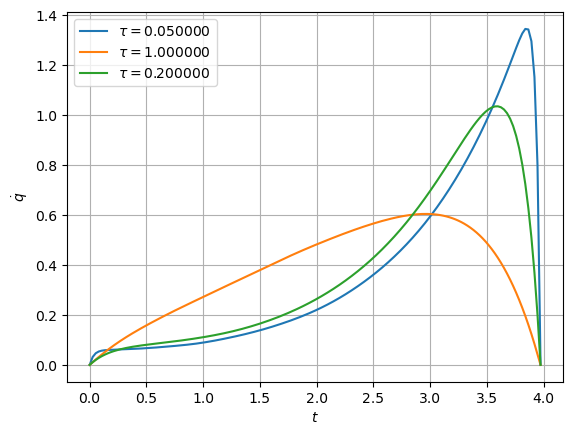

In [5]:
plt.plot(time[:-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\tau=%f$" % tau[2])
plt.plot(time[:-1], (res1.x[1:N] - res1.x[:N-1])/dt, label=r"$\tau=%f$" % tau[0])
plt.plot(time[:-1], (res2.x[1:N] - res2.x[:N-1])/dt, label=r"$\tau=%f$" % tau[1])
plt.xlabel(r"$t$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre


tau = [1.0, 0.2, 0.05]
tmax = 4
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

test_2 =  legendre.transform(lambda_=0.01, a=10.0, tau=tau[-1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res_2 = test_2.minimize(in_cond=np.ones(2*N) * (-1e-1))
test_3 =  legendre.transform(lambda_=0.1, a=10.0, tau=tau[-1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res_3 = test_3.minimize(in_cond=np.ones(2*N) * (-1e-1))

KeyboardInterrupt: 

Text(0, 0.5, '$q$')

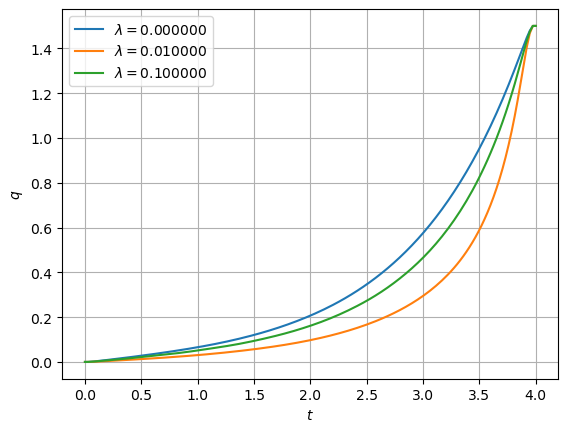

In [7]:
plt.plot(time, res.x[:N], label=r"$\lambda=%f$" % 0)
plt.plot(time, res_2.x[:N], label=r"$\lambda=%f$" % 0.01)
plt.plot(time, res_3.x[:N], label=r"$\lambda=%f$" % 0.10)
plt.legend()
plt.grid()
plt.xlabel(r"$t$")
plt.ylabel(r"$q$")

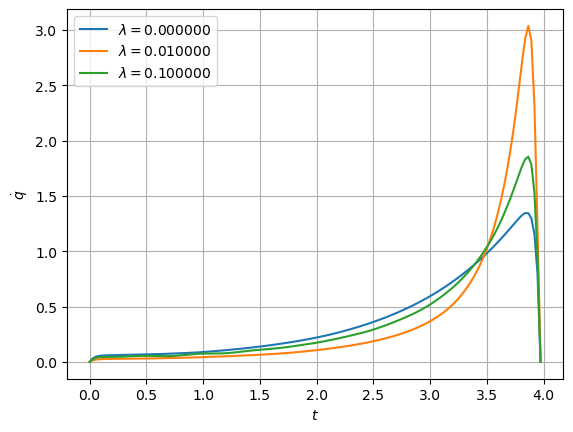

In [8]:
plt.plot(time[:-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\lambda=%f$" % 0)
plt.plot(time[:-1], (res_2.x[1:N] - res_2.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.01)
plt.plot(time[:-1], (res_3.x[1:N] - res_3.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.1)
plt.xlabel(r"$t$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

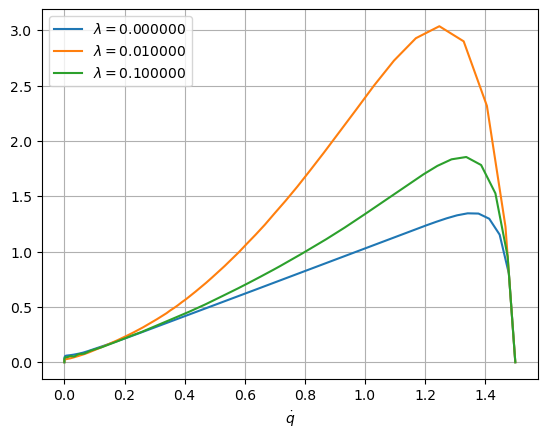

In [9]:
plt.plot(res.x[:N-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\lambda=%f$" % 0)
plt.plot(res_2.x[:N-1], (res_2.x[1:N] - res_2.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.01)
plt.plot(res_3.x[:N-1], (res_3.x[1:N] - res_3.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.1)
plt.xlabel(r"$q$")
plt.xlabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

# $\tau$ dependence of action

Can show that for a harmonic potential $V(q)=q^2/2$ the action becomes $S(\tau) = x_f^2(1+\tau)/D$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 10
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

tau = np.linspace(0, 0.99, 10)
xf = 1.5

# for V(q) = q^4 / 4 - q^2 / 2 from -1 to 0

def AP_pred(tau):
    x0 = -1
    xf = 0

    return 1/4  - tau ** 2 / 2 * (-0.25) #- tau**4 * 0.3

def MY_pred(tau):
    x0 = 0
    xf = 1.5
    return (xf**4 / 4 - 3*xf**3 / 2 + 9*xf**2 / 4) - (x0**4 / 4 - 3*x0**3 / 2 + 9*x0**2 / 4)  - tau ** 2 / 2 * (-6.40723) + tau / 2 * (xf**3 - 9*xf**2 / 2 + 9 * xf / 2)


def S_expected(tau):
    return xf**2 * (1 + tau) / 2





In [2]:
def action(tau, pot, ini, fin):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-1))
    return res.fun

def action1(tau, pot, ini, fin):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6))
    return res.fun

def action2(tau, pot, ini, fin, N=150):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6))
    return res.fun

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 10
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)


tau = np.logspace(start=0, stop=2, num=10, base=10, endpoint=True)

def action2(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6), maxiter=maxiter)
    return res.fun

[0.24995488 0.24994876 0.24996693 0.25007372 0.25040768 0.25150036
 0.25454393 0.26215753 0.27897037 0.31244737]
[0.06091299 0.04146483 0.01604221 0.02144097 0.07108267 0.15682615
 0.284729   0.45669235 0.65239415 0.84303952]
0.07407407407407407


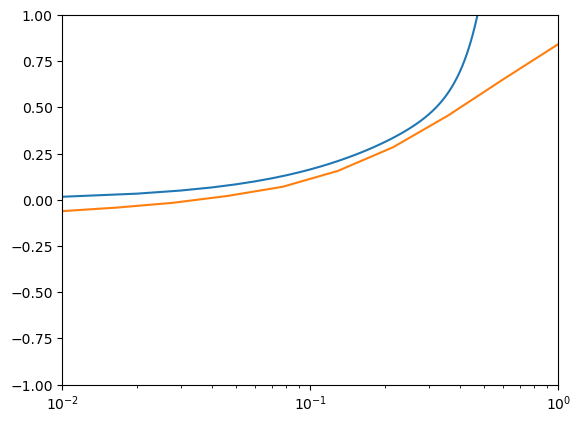

In [29]:
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

t = np.linspace(1e-2, 1, 100)
#plt.plot(tau, S3)
#plt.plot(tau, S4)
S5 = np.array(S5)
plt.plot(t, (g(t)- AP_pred(0))/(8/27 * t * AP_pred(0)))
plt.plot(tau, (S5 - AP_pred(0))/(8/27 * tau * AP_pred(0)))
plt.xscale("log")
#plt.yscale("log")

print(S5)
plt.axis([1e-2, 1e0, -1, 1])
print(np.abs(S5-AP_pred(0))/(8/27 * tau*AP_pred(0)))
print(8/27 * AP_pred(0))


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 1000
N = 500
dt = tmax/N
time = np.linspace(0, tmax, N)

def actionTest(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.TransformLargeTau(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(N) * (-1), guess=np.ones(N) * (-1e-6), maxiter=maxiter)
    return res.fun, res.x

def action2(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(N) * (-1e-6), maxiter=maxiter)
    return res.fun, res.x[:N]

def action_adj(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


#R = actionTest(100, "m", -1, 0, N=N)[-1]

#R1 = action2(100, "m", -1, 0, N=N)[-1]







In [97]:
R2 = action_adj(100, "m", -1, 0, N=N)[-1]

Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.989098649340517
            Iterations: 501
            Function evaluations: 252914
            Gradient evaluations: 501


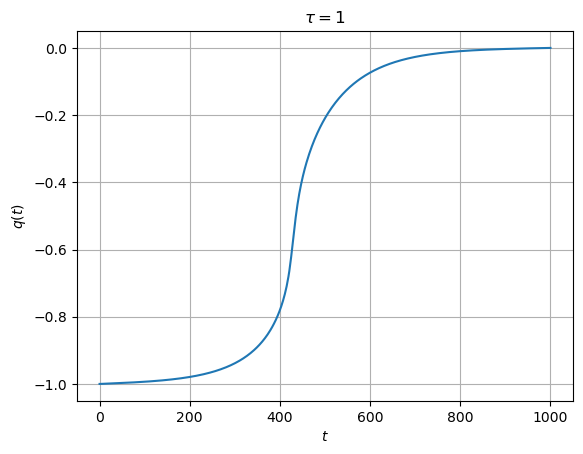

In [98]:
#plt.plot(np.linspace(0, tmax, N), R)
#plt.plot(np.linspace(0, tmax, N), R1)
plt.plot(np.linspace(0, tmax, N), R2)
plt.xlabel(r"$t$")
plt.ylabel(r"$q(t)$")
plt.grid()
plt.title(r"$\tau=100$")
plt.show()

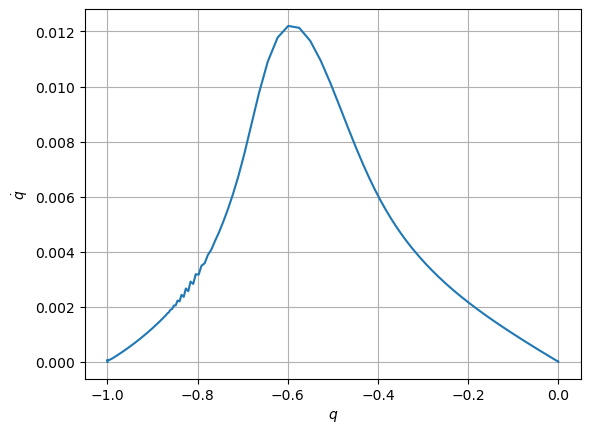

In [100]:
plt.plot(R2[:-1], (R2[1:] - R2[:-1]) / dt)
#plt.plot(R1[:-1], (R1[1:] - R1[:-1]) / dt)
plt.xlabel(r"$q$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.show()

# Fix large tau limit

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tau = np.logspace(0, 2, base=10, endpoint=True, num=10)
N = 200
tmax = 1000
time = np.linspace(0, tmax, N)

def action_adj(tau, pot, ini, fin, N=250, maxiter=1500, tmax=tmax):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


instanton = np.linspace(-1, 0, N)

S = []
n = [300, 300, 300, 300, 300, 300, 500, 500, 550, 550]
tmax=[100,200, 300, 300, 300, 300, 1000, 1000, 1000, 1000]


i = 0
for t in tau:
    tm = tmax[i]
    N = n[i] #* (1+int(np.log(t)))
    s, instanton = action_adj(t, "m", -1, 0, N=N, tmax=tm)
    print(tm, N, t)
    if t == tau[0]:
        inst = instanton
    S.append(s)
    i += 1







Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2971724955319758
            Iterations: 119
            Function evaluations: 36056
            Gradient evaluations: 119
100 300 1.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3362294529444075
            Iterations: 67
            Function evaluations: 20296
            Gradient evaluations: 67
200 300 1.6681005372000588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.417001148059744
            Iterations: 61
            Function evaluations: 18479
            Gradient evaluations: 61
300 300 2.7825594022071245
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.584301625509048
            Iterations: 98
            Function evaluations: 29692
            Gradient evaluations: 98
300 300 4.641588833612778
Optimization terminated successfully    (Exit mode 0)
  

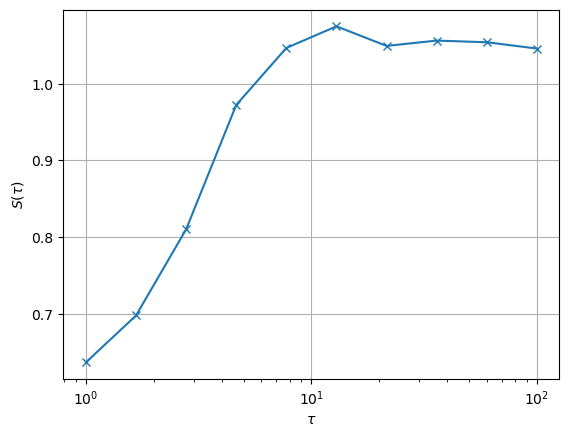

[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


In [112]:
plt.plot(tau, (np.array(S)-0.25) /(2/27* tau), "x-")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S(\tau)$")
plt.grid()
plt.xscale("log")
plt.show()


[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


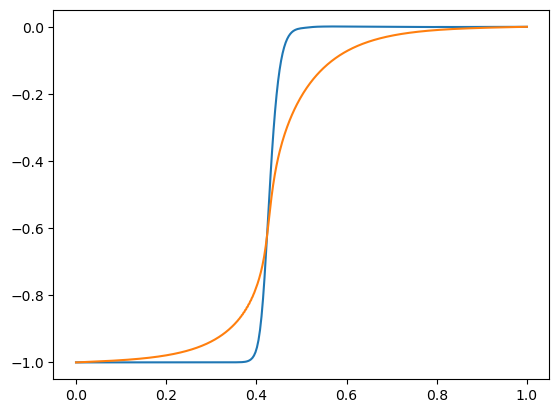

[-1.00000000e+00 -1.00000000e+00 -1.00000030e+00 -1.00003478e+00
 -1.00004738e+00 -1.00004815e+00 -1.00003171e+00 -1.00000906e+00
 -1.00000847e+00 -1.00002633e+00 -1.00004927e+00 -1.00005993e+00
 -1.00006372e+00 -1.00006427e+00 -1.00006846e+00 -1.00006760e+00
 -1.00006470e+00 -1.00005731e+00 -1.00004889e+00 -1.00003809e+00
 -1.00002648e+00 -1.00002052e+00 -1.00001902e+00 -1.00003035e+00
 -1.00004081e+00 -1.00005587e+00 -1.00005678e+00 -1.00005160e+00
 -1.00003221e+00 -1.00000799e+00 -9.99985047e-01 -9.99965736e-01
 -9.99963847e-01 -9.99970919e-01 -9.99992514e-01 -1.00001335e+00
 -1.00002397e+00 -1.00001932e+00 -9.99990846e-01 -9.99955045e-01
 -9.99919224e-01 -9.99900417e-01 -9.99910690e-01 -9.99933674e-01
 -9.99965987e-01 -9.99978050e-01 -9.99961092e-01 -9.99931436e-01
 -9.99895720e-01 -9.99889050e-01 -9.99912101e-01 -9.99938879e-01
 -9.99958824e-01 -9.99945137e-01 -9.99913201e-01 -9.99907778e-01
 -9.99923856e-01 -9.99953195e-01 -9.99975897e-01 -9.99955392e-01
 -9.99934541e-01 -9.99966

In [116]:
t1 = np.linspace(0, tmax[0], n[0])/tmax[0]
t2 = np.linspace(0, tmax[-1], n[-1])/tmax[-1]
plt.plot(t1, inst)
plt.plot(t2, instanton)
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995664719510244
            Iterations: 69
            Function evaluations: 13938
            Gradient evaluations: 69


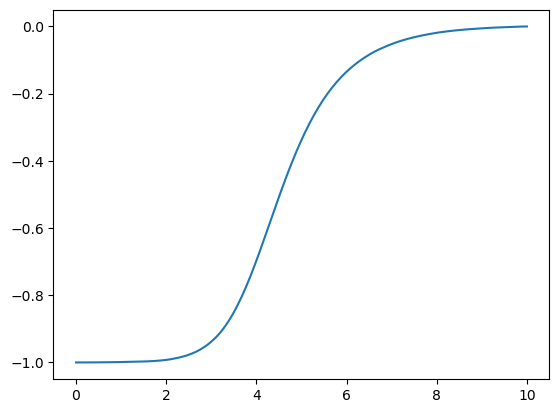

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed


def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


tm = 10
N = 200

Act, Inst = action_adj(tau=0, pot="m", ini=-1, fin=0, N=200, tm=tm, maxiter=1500)
t = np.linspace(0, tm, N)

plt.plot(t, Inst)

In [2]:
tau = np.zeros(11)
tau[1:] = np.logspace(-2, -1, base=10, endpoint=True, num=10)
n = []
tm = []
for i in range(len(tau[tau<=1])):
    n.append(300)
    tm.append(10)



# k = [300, 300, 300, 300, 300, 300, 500, 500, 550, 550]
# tx=[100,200, 300, 300, 300, 300, 1000, 1000, 1000, 1000]



# for i in range(10):
#     n.append(k[i])
#     tm.append(tx[i])

# k = np.ones(len(tau)-len(n), dtype=int) * 1000
# tx= np.ones(len(tau)-len(n)) * 10000

# for i in range(len(tau)-len(n)):
#     n.append(k[i])
#     tm.append(tx[i])

# print(tau)
# print(len(tau)-len(n))
# print(n)

In [3]:
tau = np.logspace(start=0, stop=3, num=10, base=10, endpoint=True)

def action2(tau, pot, ini, fin, N=200):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6))
    print(res.fun)
    return res.fun

# S3 = Parallel(n_jobs=5)(delayed(action)(tau=t, pot="h", ini=0.0, fin=1.5) for t in tau)
# S4 = Parallel(n_jobs=5)(delayed(action)(tau=t, pot="ms", ini=0.0, fin=1.5) for t in tau)
S5 = Parallel(n_jobs=8)(delayed(action2)(tau=t, pot="m", ini=-1.0, fin=0.0) for t in tau)


/home/vetkje/Documents/Internship/numerics/legendre.py:480: RuntimeWarning: overflow encountered in sinh
  return np.sinh(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04173811611841039
            Iterations: 91
            Function evaluations: 36543
            Gradient evaluations: 91
0.04173811611841039 0.08333333333333333


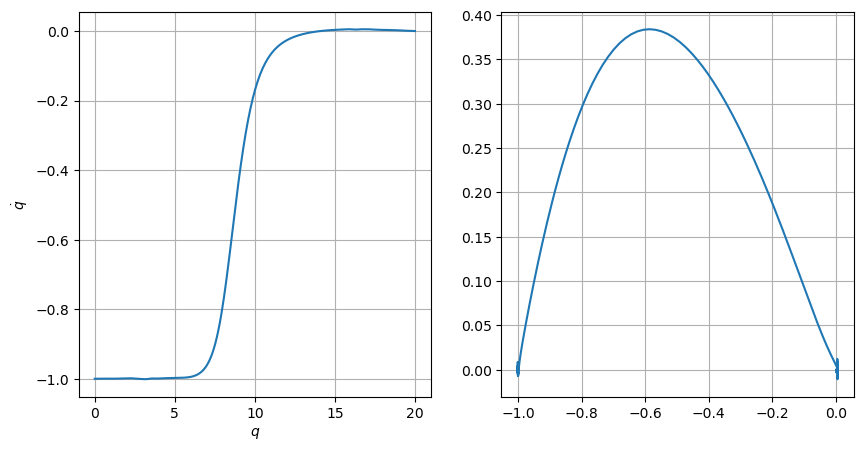

In [10]:
def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500, lambd=0, a=0):
    test =  legendre.transform_adjust(lambda_=lambd, a=a, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun,res.x[:N]
tm = 20
N = 400
ind = 5
a = 10
l = 0.01
dt = tm/N

Act, Inst = action_adj(tau=0.0, pot="m", ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=l)


print(Act, 0.25/(2 + l * a ** 2), Act/(0.25/(2 + l * a ** 2)))
t = np.linspace(0, tm, N)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(t, Inst)
ax[1].plot(Inst[:-1], (Inst[1:]-Inst[:-1])/dt, "-")
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel(r"$t$")
ax[0].set_ylabel(r"$q$")
ax[0].set_xlabel(r"$q$")
ax[0].set_ylabel(r"$\dot{q}$")
plt.show()

In [4]:
print(S5)

[0.31092504289876954, 0.44028779160463977, 0.9739354410687125, 3.4400536077828674, 14.906287284515907, 68.18720732014935, 315.6166105105319, 1463.583464296928, nan, nan]
